In [1]:
import pandas as pd
import dabest
import glob
import matplotlib as mpl
import seaborn as sns

print("matplotlib v{}".format(mpl.__version__))
print("seaborn v{}".format(sns.__version__))
print("dabest v{}".format(dabest.__version__))

matplotlib v3.1.3
seaborn v0.10.0
dabest v0.3.0


In [2]:
filteredGeneList = pd.read_csv('../Database/filteredGenesDetails_human_240118.txt',sep='\t')

In [3]:
acc2gene={}
gene2acc={}
for idx,row in filteredGeneList.iterrows():
    acc2gene[row['AccNum']] = row['GeneName']
    gene2acc[row['GeneName']] = row['AccNum']

In [4]:
files = glob.glob("../Deseq2 Analysis/shift15/coding/csv_raw/*.csv")

In [53]:
L24_1 = pd.read_csv("../Deseq2 Analysis/shift15/coding/csv_raw/ER_L24_t1.csv")
L24_1_filtered = L24_1.loc[L24_1['padj']<0.05]
L24_1_up = L24_1_filtered.loc[L24_1_filtered['log2FoldChange']>=1]
genes= L24_1_up['Unnamed: 0']
genes.head()
names = [acc2gene[acc] for acc in genes]
L24_1_others = L24_1_filtered.loc[L24_1_filtered['log2FoldChange']<1]

In [6]:
L24_0 = pd.read_csv("../Deseq2 Analysis/shift15/coding/csv_raw/ER_L24_t0.csv")
L24_0_sel = L24_0[L24_0['Unnamed: 0'].isin(genes)]
L24_0_sel.head()

,Unnamed: 0,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
91,NM_024299,316.129419,0.623836,0.429604,1.452120,0.146468,0.606297
196,NM_004642,188.177831,0.532590,0.298818,1.782322,0.074697,0.509287
458,NM_001317980,50.040984,0.006071,0.333314,0.018214,0.985468,0.997180
535,NM_172251,262.985722,0.504539,0.210147,2.400884,0.016356,0.355962
651,NM_021066,2480.270831,0.442302,0.271621,1.628381,0.103444,0.563345


In [7]:
L24_2 = pd.read_csv("../Deseq2 Analysis/shift15/coding/csv_raw/ER_L24_t2.csv")
L24_2_sel = L24_2[L24_2['Unnamed: 0'].isin(genes)]
L24_2_sel.head()

,Unnamed: 0,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
91,NM_024299,316.129419,0.028291,0.427979,0.066105,0.947295,0.999706
196,NM_004642,188.177831,0.258075,0.383220,0.673438,0.500668,0.999706
458,NM_001317980,50.040984,0.202839,0.377017,0.538010,0.590570,0.999706
535,NM_172251,262.985722,0.233743,0.217209,1.076122,0.281873,0.999706
651,NM_021066,2480.270831,0.449165,0.268429,1.673311,0.094266,0.999706


In [54]:
df = pd.DataFrame({'AccNum':genes,'Gene':names,
                   'L24_1':L24_1_up['log2FoldChange'],
                  'L24_0':L24_0_sel['log2FoldChange'],
                  'L24_2':L24_2_sel['log2FoldChange']})

In [ ]:
batch='L24_t1_t0'
df_dabest = dabest.load(data=df,idx=('L24_0','L24_1'),id_col="Genes",paired=True,resamples=50000)

In [ ]:
plt=df_dabest.mean_diff.plot(swarm_label="log2FC",contrast_label="diff",dpi=300,es_marker_size=3);
plt.savefig('paired/'+batch+'.png',dpi=300)

In [ ]:
batch='L24_t1_t2'
df_dabest = dabest.load(data=df,idx=('L24_1','L24_2'),id_col="Genes",paired=True,resamples=50000)

In [ ]:
plt=df_dabest.mean_diff.plot(swarm_label="log2FC",contrast_label="diff",dpi=300,es_marker_size=3);
plt.savefig('paired/'+batch+'.png',dpi=300)

In [19]:
TE_t0 = pd.read_csv("../Deseq2 Analysis/shift15/coding/csv_raw/TE_t0.csv")
TE_t0 = TE_t0[TE_t0['Unnamed: 0'].isin(genes)]
TE_t0.head(2)

,Unnamed: 0,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
91,NM_024299,316.129419,1.173491,0.449557,2.610330,0.009045,0.020709
196,NM_004642,188.177831,0.250087,0.304900,0.820229,0.412086,0.514222


In [20]:
TE_t1 = pd.read_csv("../Deseq2 Analysis/shift15/coding/csv_raw/TE_t1.csv")
TE_t1 = TE_t1[TE_t1['Unnamed: 0'].isin(genes)]
TE_t1.head(2)

,Unnamed: 0,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
91,NM_024299,316.129419,-0.105371,0.428911,-0.245671,0.805937,0.855398
196,NM_004642,188.177831,-0.559566,0.311597,-1.795801,0.072526,0.118310


In [21]:
TE_t2 = pd.read_csv("../Deseq2 Analysis/shift15/coding/csv_raw/TE_t2.csv")
TE_t2 = TE_t2[TE_t2['Unnamed: 0'].isin(genes)]
TE_t2.head(2)

,Unnamed: 0,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
91,NM_024299,316.129419,1.161387,0.433424,2.679567,0.007372,0.016719
196,NM_004642,188.177831,0.573842,0.405949,1.413581,0.157485,0.229074


In [68]:
df = pd.DataFrame({'AccNum':genes,'Gene':names,
                  'TE_t1-t0':TE_t1['log2FoldChange'] - TE_t0['log2FoldChange'],
                  'TE_t2-t1':TE_t2['log2FoldChange']-TE_t1['log2FoldChange'],
                  'ER_t1':L24_1_up['log2FoldChange']})

In [69]:
df_out=df.sort_values('TE_t1-t0',ascending=False)
df_out.to_csv('paired/TEs_sortbyt1-t0_L24up.csv',index=False)

In [25]:
batch='TE_t0_t1_for_L24_t1_up'
df_dabest = dabest.load(data=df,idx=('TE_t0','TE_t1'),id_col="Genes",paired=True,resamples=50000)

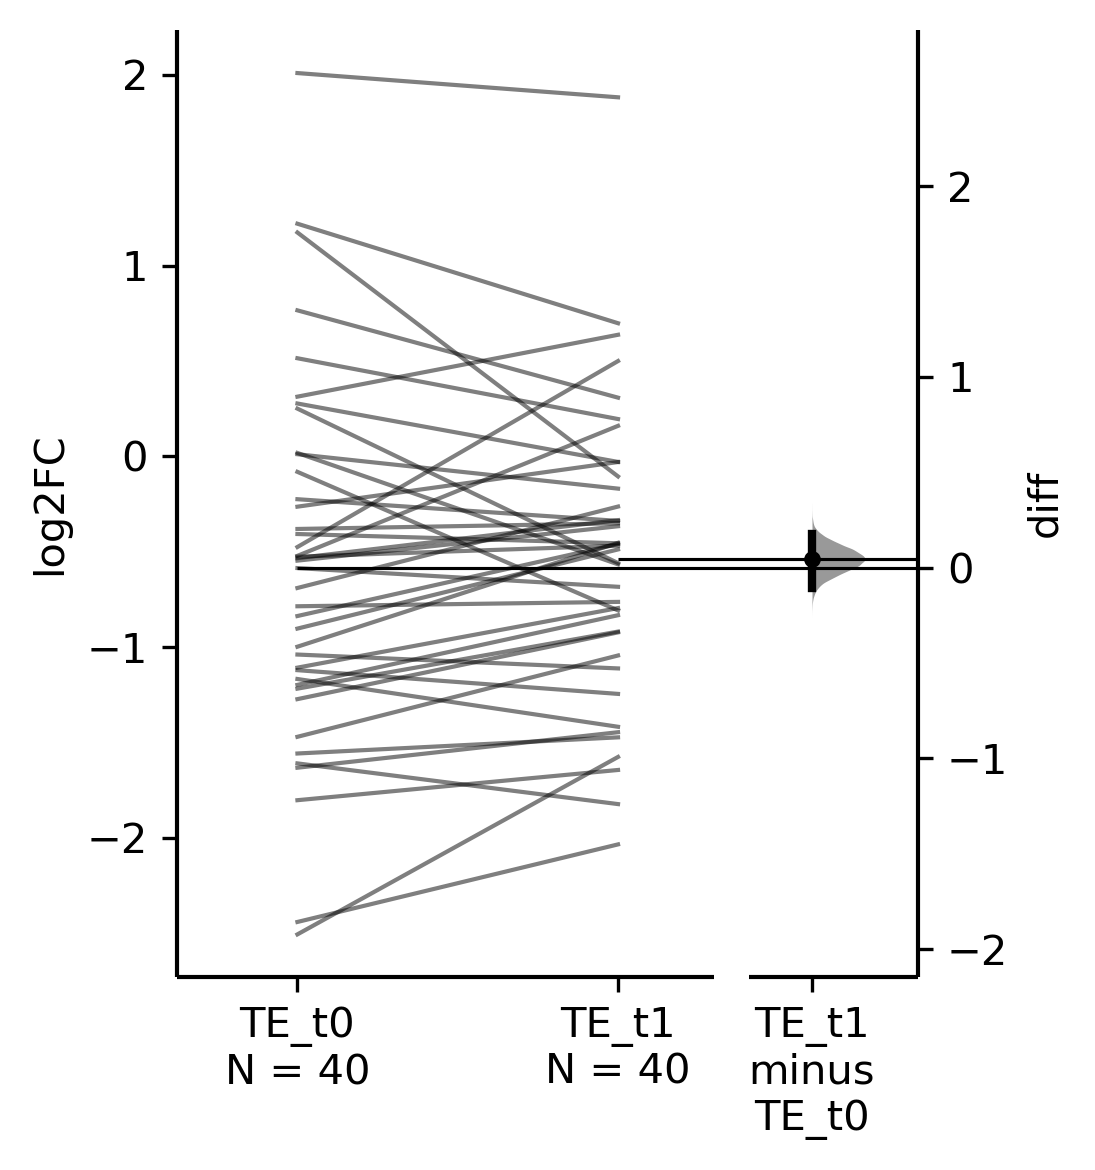

In [26]:
plt=df_dabest.mean_diff.plot(swarm_label="log2FC",contrast_label="diff",dpi=300,es_marker_size=3);
plt.savefig('paired/'+batch+'.png',dpi=300)

In [27]:
batch='TE_t1_t2_for_L24_t1_up'
df_dabest = dabest.load(data=df,idx=('TE_t1','TE_t2'),id_col="Genes",paired=True,resamples=50000)

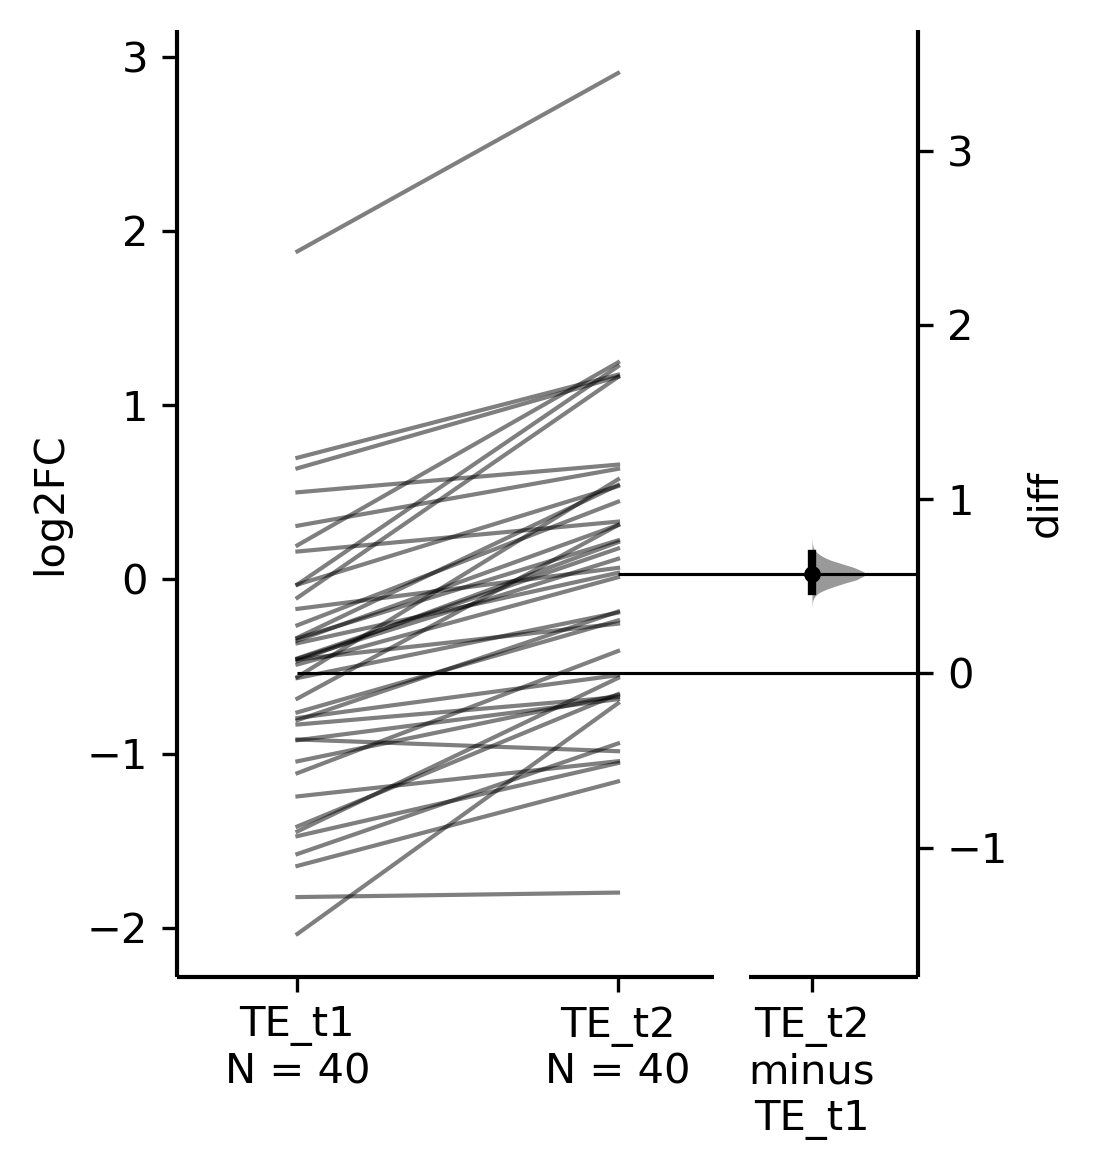

In [28]:
plt=df_dabest.mean_diff.plot(swarm_label="log2FC",contrast_label="diff",dpi=300,es_marker_size=3);
plt.savefig('paired/'+batch+'.png',dpi=300)

In [33]:
import numpy as np
TE_1_0 = pd.read_csv("../Deseq2 Analysis/shift15/coding/csv_raw/TE_t1_t0.csv")
TE_1_0['Group']=np.nan
TE_1_0.head(3)

,Unnamed: 0,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Group
0,NM_017847,112.294090,0.254491,0.376597,0.675765,0.499190,0.849345,NaN
1,NM_001003803,182.333378,0.198872,0.338664,0.587225,0.557053,0.873862,NaN
2,NM_001003800,354.785989,-0.144924,0.514703,-0.281568,0.778275,0.955063,NaN


In [39]:
TE_1_0.loc[TE_1_0['Unnamed: 0'].isin(genes),"Group"] = 'L24_t1_up'
TE_1_0.loc[TE_1_0['Unnamed: 0'].isin(L24_1_others['Unnamed: 0']),"Group"] = 'Others'

In [40]:
df_dabest = dabest.load(data=TE_1_0,idx=('Others','L24_t1_up'),x='Group',y='log2FoldChange',paired=False,resamples=50000)

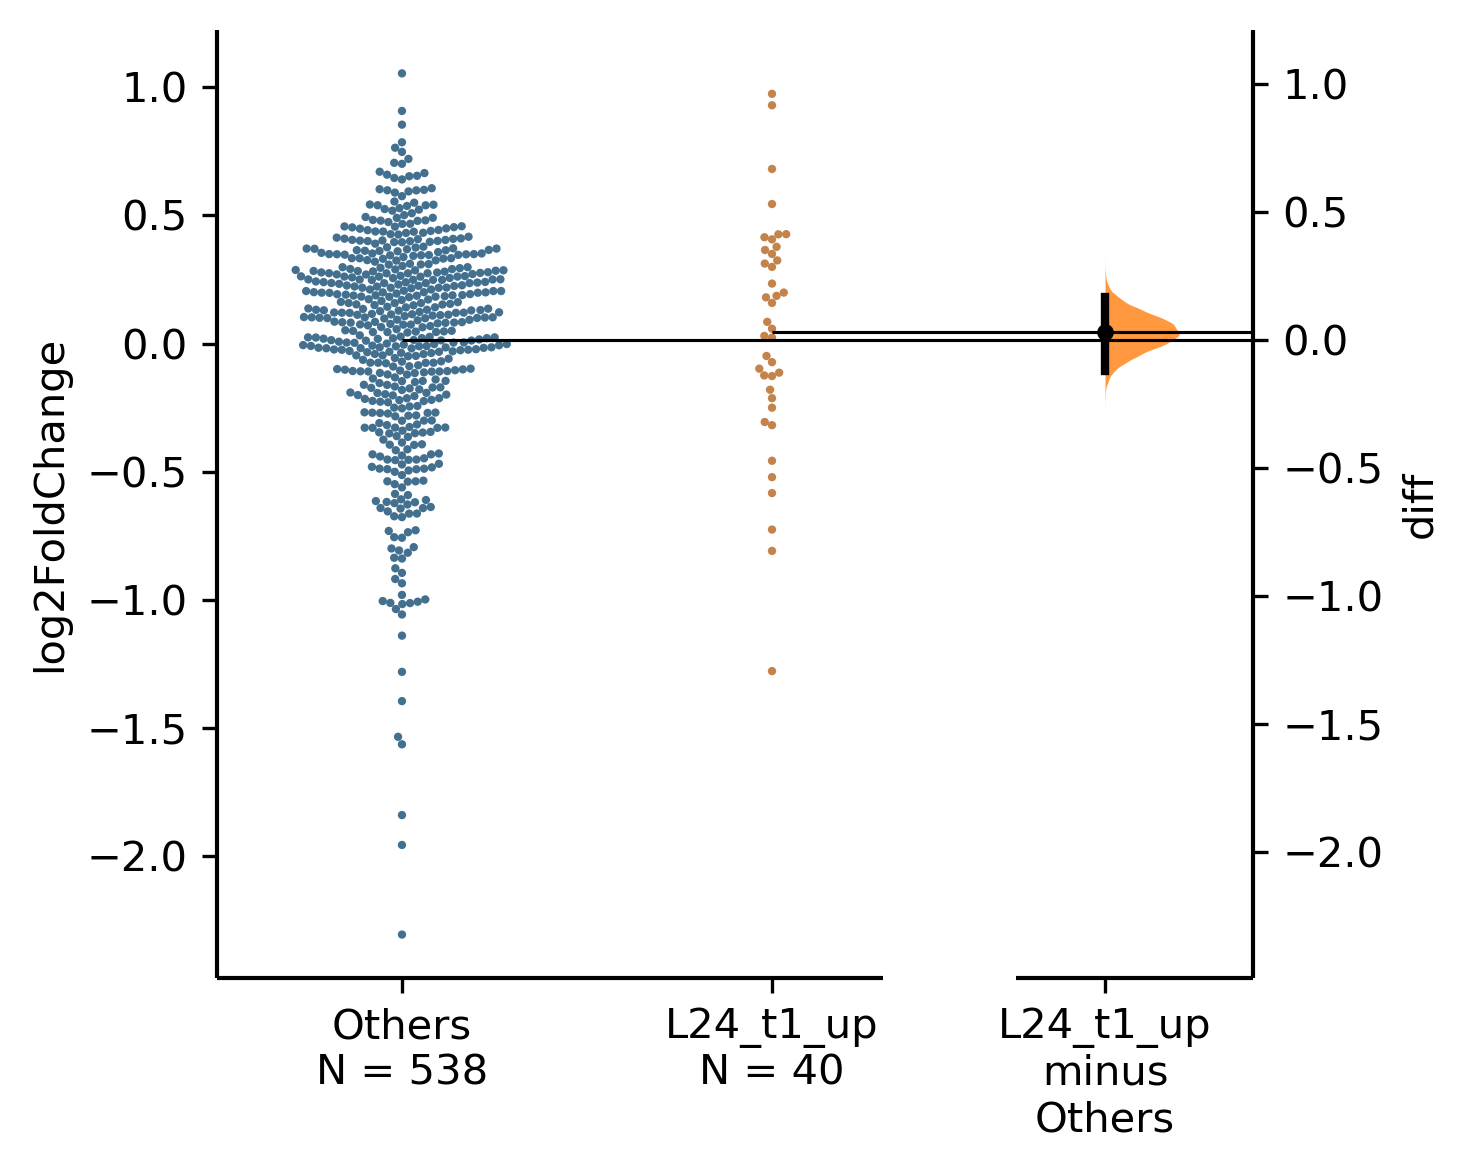

In [42]:
plt=df_dabest.mean_diff.plot(swarmplot_kwargs={"size":2},swarm_label=("log2FoldChange"),contrast_label="diff",dpi=300,es_marker_size=3);
plt.savefig('TE_1vs0_for_L24_t1_up.png',dpi=300)

In [5]:
S15_1 = pd.read_csv("../Deseq2 Analysis/shift15/coding/csv_raw/ER_S15_t1.csv")
S15_1_filtered = S15_1.loc[S15_1['padj']<0.05]
S15_1_up = S15_1_filtered.loc[S15_1_filtered['log2FoldChange']>=1]
genes= S15_1_up['Unnamed: 0']
genes.head()
names = [acc2gene[acc] for acc in genes]
S15_1_others = S15_1_filtered.loc[S15_1_filtered['log2FoldChange']<1]

In [6]:
TE_t0 = pd.read_csv("../Deseq2 Analysis/shift15/coding/csv_raw/TE_t0.csv")
TE_t0 = TE_t0[TE_t0['Unnamed: 0'].isin(genes)]
TE_t1 = pd.read_csv("../Deseq2 Analysis/shift15/coding/csv_raw/TE_t1.csv")
TE_t1 = TE_t1[TE_t1['Unnamed: 0'].isin(genes)]
TE_t2 = pd.read_csv("../Deseq2 Analysis/shift15/coding/csv_raw/TE_t2.csv")
TE_t2 = TE_t2[TE_t2['Unnamed: 0'].isin(genes)]
TE_t2.head(2)

,Unnamed: 0,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
24,NM_005258,104.661616,-0.595380,0.291197,-2.044597,0.040895,0.073492
66,NM_020195,138.611210,0.987967,0.367037,2.691736,0.007108,0.016208


In [12]:
df = pd.DataFrame({'AccNum':genes,'Gene':names,
                  'TE_t0':TE_t0['log2FoldChange'],
                  'TE_t1':TE_t1['log2FoldChange'],
                  'TE_t2':TE_t2['log2FoldChange'],
                  'ER_t1':S15_1_up['log2FoldChange']})

In [13]:
# df_out=df.sort_values('TE_t1-t0',ascending=False)
# df_out.to_csv('paired/TEs_sortbyt1-t0_S15up.csv',index=False)

In [15]:
batch='TE_t0_t1_for_S15_t1_up'
df_dabest = dabest.load(data=df,idx=('TE_t0','TE_t1'),id_col="Gene",paired=True,resamples=50000)

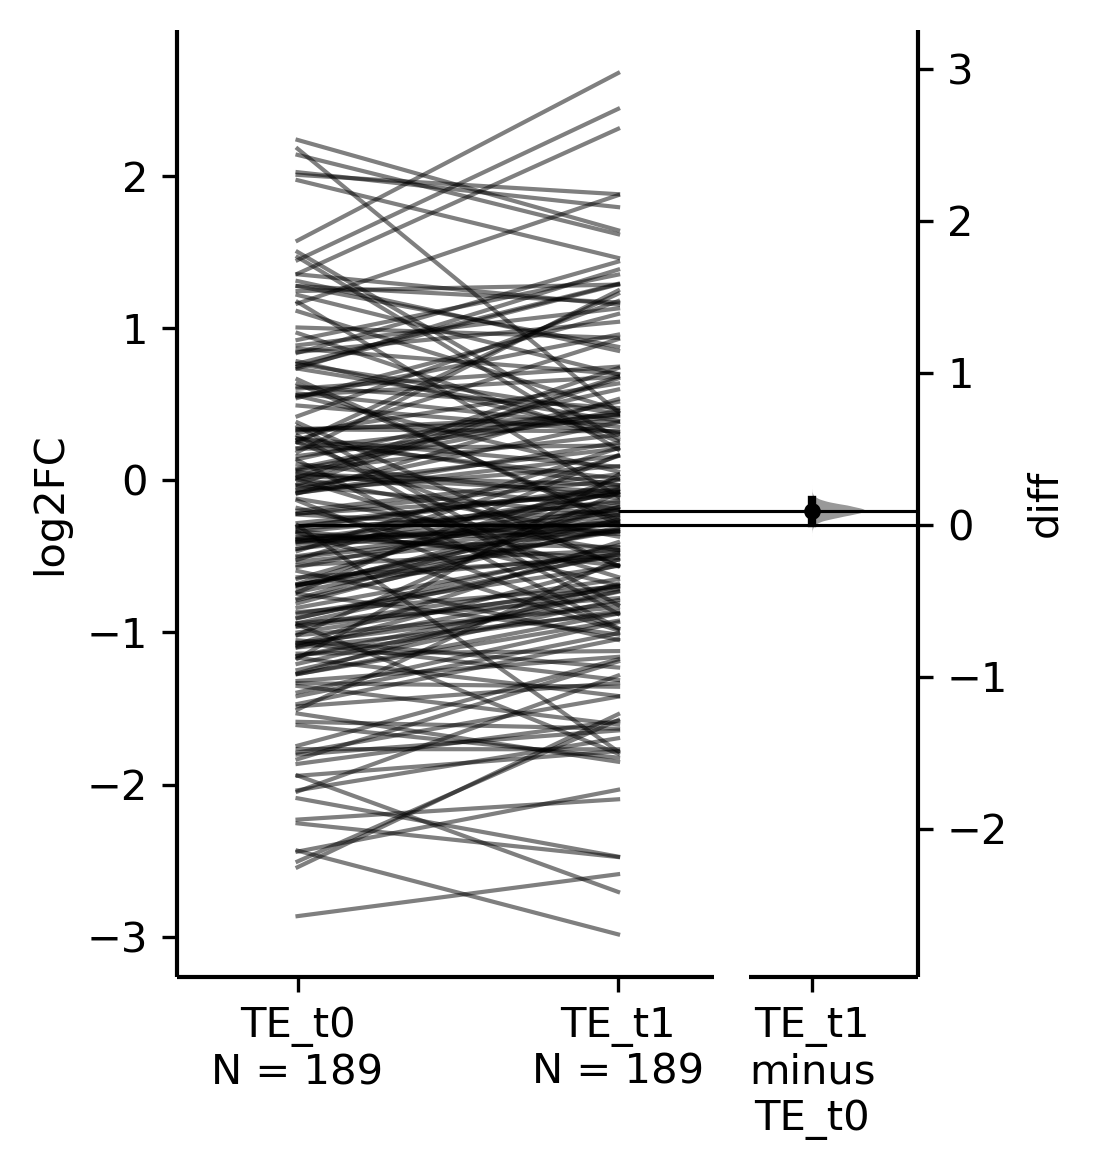

In [16]:
plt=df_dabest.mean_diff.plot(swarm_label="log2FC",contrast_label="diff",dpi=300,es_marker_size=3);
plt.savefig('paired/'+batch+'.png',dpi=300)

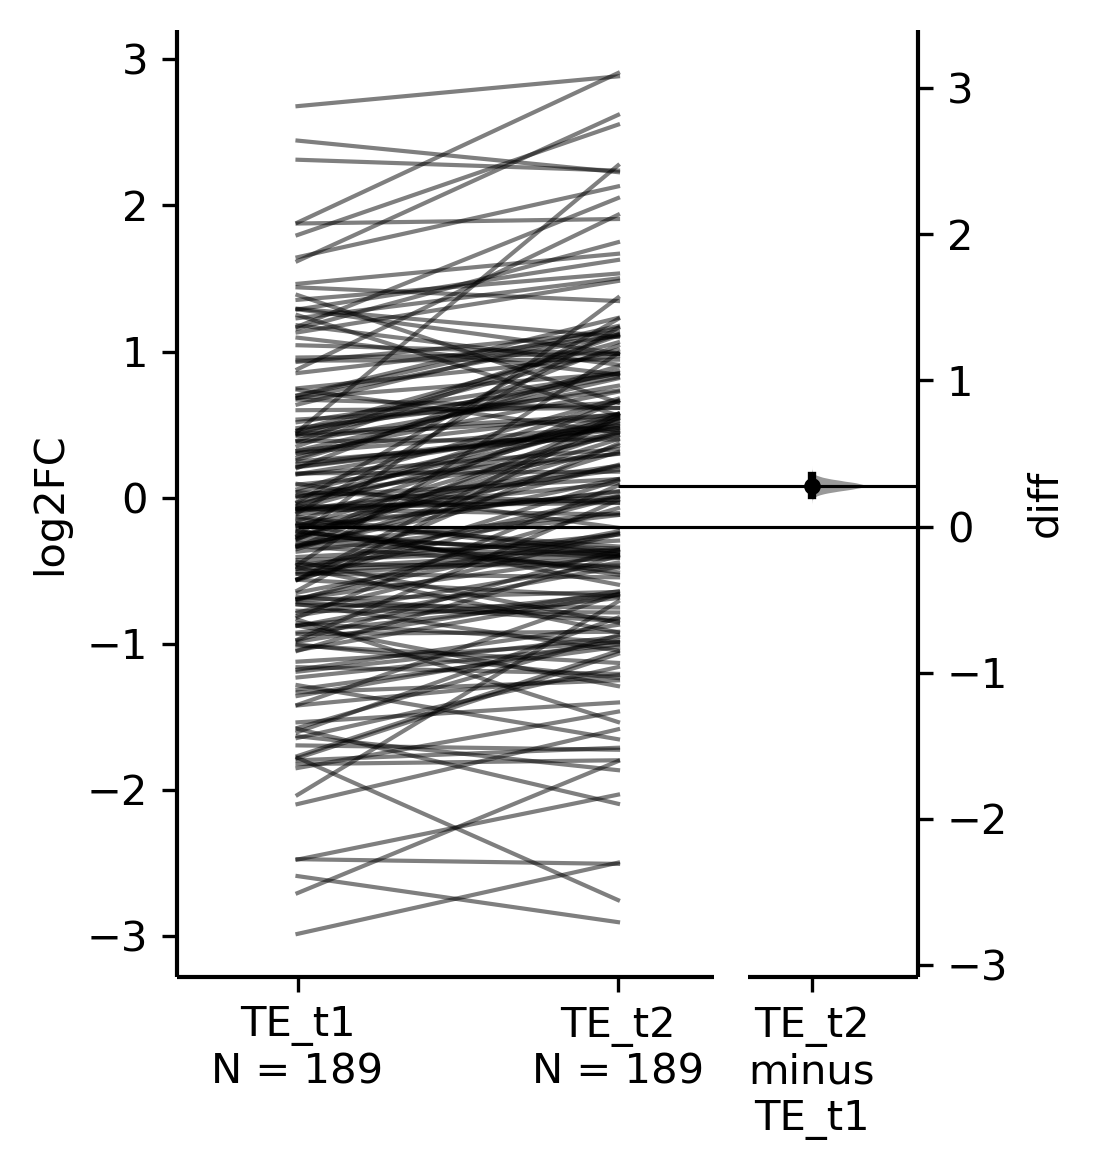

In [17]:
batch='TE_t1_t2_for_S15_t1_up'
df_dabest = dabest.load(data=df,idx=('TE_t1','TE_t2'),id_col="Gene",paired=True,resamples=50000)
plt=df_dabest.mean_diff.plot(swarm_label="log2FC",contrast_label="diff",dpi=300,es_marker_size=3);
plt.savefig('paired/'+batch+'.png',dpi=300)

In [24]:
import numpy as np
TE_2_1 = pd.read_csv("../Deseq2 Analysis/shift15/coding/csv_raw/TE_t2_t1.csv")
TE_2_1['Group']=np.nan
TE_2_1.head(3)

,Unnamed: 0,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Group
0,NM_017847,112.294090,-0.796732,0.432941,-1.840280,0.065727,0.999629,NaN
1,NM_001003803,182.333378,-0.188181,0.319531,-0.588930,0.555908,0.999629,NaN
2,NM_001003800,354.785989,0.296601,0.534332,0.555088,0.578834,0.999629,NaN


In [25]:
TE_2_1.loc[TE_2_1['Unnamed: 0'].isin(genes),"Group"] = 'S15_t1_up'
TE_2_1.loc[TE_2_1['Unnamed: 0'].isin(S15_1_others['Unnamed: 0']),"Group"] = 'Others'

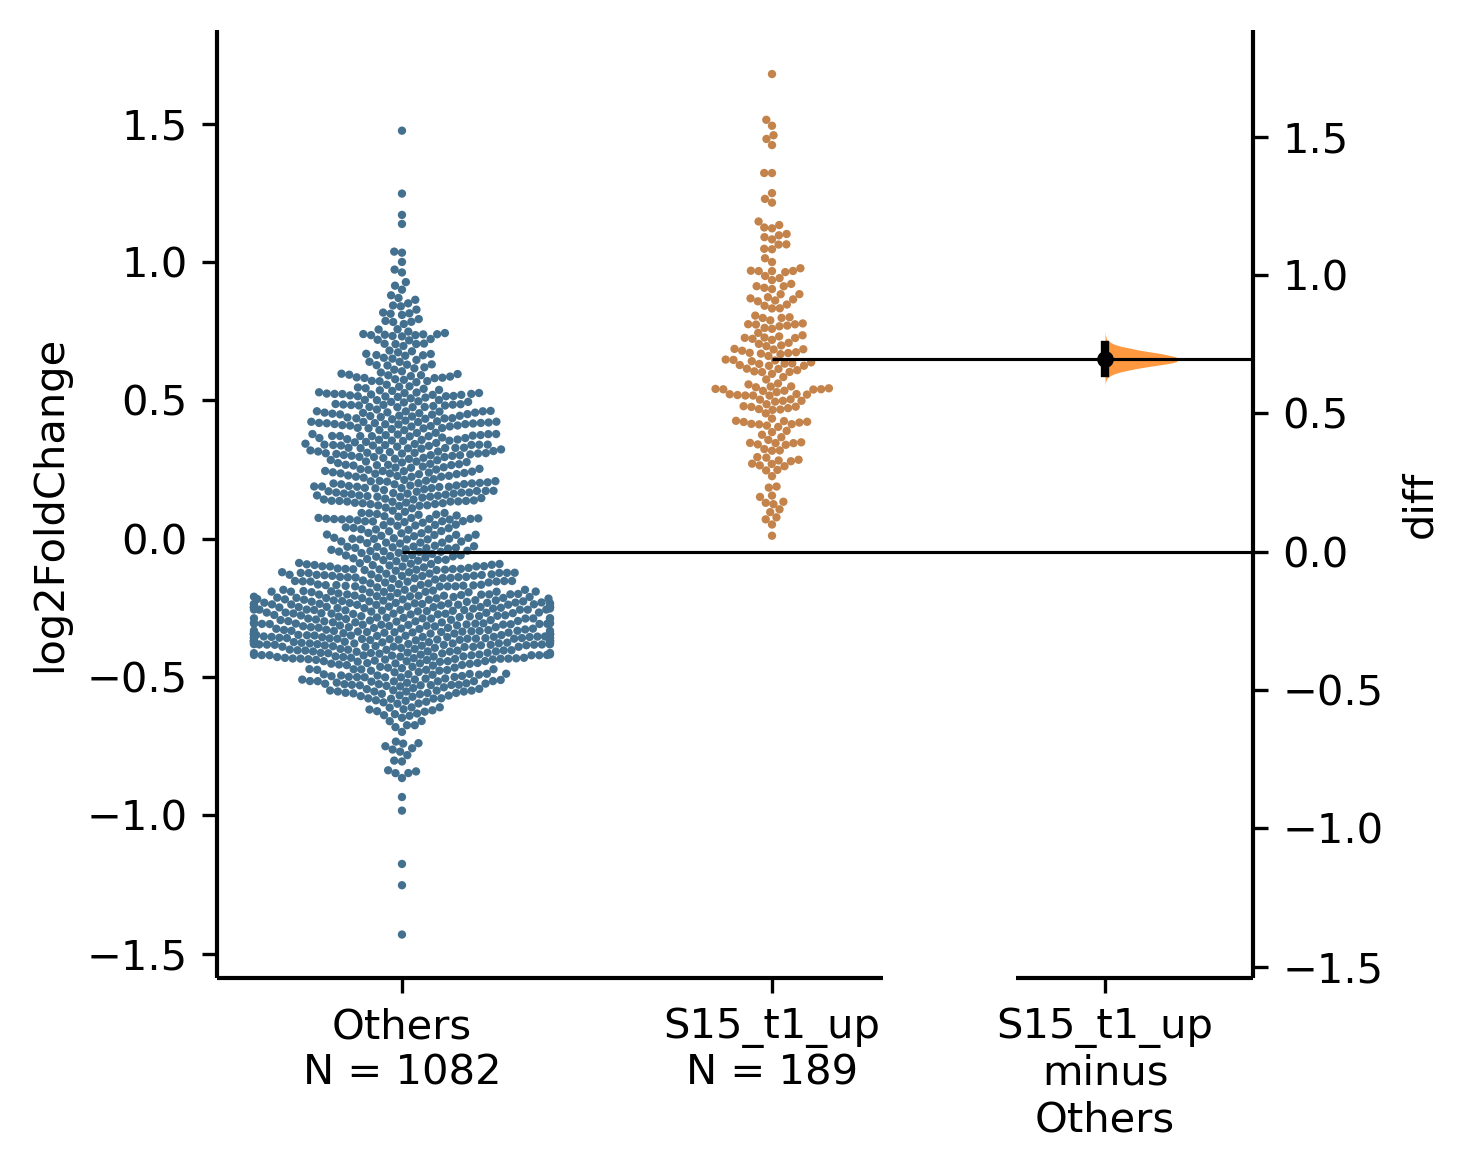

In [26]:
df_dabest = dabest.load(data=TE_2_1,idx=('Others','S15_t1_up'),x='Group',y='log2FoldChange',paired=False,resamples=50000)
plt=df_dabest.mean_diff.plot(swarmplot_kwargs={"size":2},swarm_label=("log2FoldChange"),contrast_label="diff",dpi=300,es_marker_size=3);
plt.savefig('TE_2vs1_for_S15_t1_up.png',dpi=300)